# EDA 진행
- 데이터 확인 
- 일자별 
- 시간대별 
- 요일별 

In [2]:
# import plotly.plotly as py
import chart_studio.plotly as iplot
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format = 'retina'
cf.go_offline()

0.17.3


In [3]:
%%time
query = """
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2016` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour
"""

df = pd.read_gbq(query=query, dialect='standard', project_id='nyc-taxi-302111', auth_local_webserver=True)

# 2016년 1월의 전체 trip 수 가져오기 

Wall time: 15.1 s


In [4]:
df

,pickup_hour,cnt
0,2016-01-01 00:00:00,25270
1,2016-01-01 01:00:00,28511
2,2016-01-01 02:00:00,25490
3,2016-01-01 03:00:00,21277
4,2016-01-01 04:00:00,15419
...,...,...
739,2016-01-31 19:00:00,17659
740,2016-01-31 20:00:00,14886
741,2016-01-31 21:00:00,14190
742,2016-01-31 22:00:00,12911


In [5]:
# dt형변환 
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df.tail()

,pickup_hour,cnt
739,2016-01-31 19:00:00,17659
740,2016-01-31 20:00:00,14886
741,2016-01-31 21:00:00,14190
742,2016-01-31 22:00:00,12911
743,2016-01-31 23:00:00,9258


In [6]:
df = df.set_index('pickup_hour')
df.head()

,cnt
pickup_hour,
2016-01-01 00:00:00,25270
2016-01-01 01:00:00,28511
2016-01-01 02:00:00,25490
2016-01-01 03:00:00,21277
2016-01-01 04:00:00,15419


In [7]:
df.iplot(kind='scatter', xTitle = 'Datetimes',yTitle='Demand',title='NYC Taxi Demand(2016-01)')

# 1월 24일에 유독 낮음 
# 블리자드 눈보라의 영향 (https://en.wikipedia.org/wiki/January_2016_United_States_blizzard)

In [8]:
# 일별 여행수 

df['date'] = df.index.date
df.groupby(['date'])[['cnt']].sum().iplot()

In [9]:
# 요일별 시간대별 trip 수 

df.head()

,cnt,date
pickup_hour,,
2016-01-01 00:00:00,25270,2016-01-01
2016-01-01 01:00:00,28511,2016-01-01
2016-01-01 02:00:00,25490,2016-01-01
2016-01-01 03:00:00,21277,2016-01-01
2016-01-01 04:00:00,15419,2016-01-01


In [10]:
# 요일별 dttime을 사용하여 추가하기 
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['weeknum'] = df.index.week

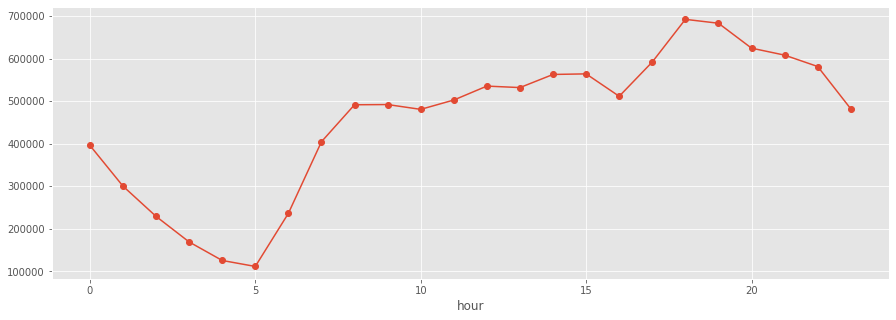

In [11]:
df.groupby('hour')['cnt'].sum().plot(x='hour', y='cnt', kind='line', style="-o", figsize=(15,5));

In [12]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,7091.25,7648.50,8371.25,9568.25,15687.2,19233.6,18142.6
1,4542.75,4325.75,4855.00,5705.75,12449.4,16159.2,15913.0
2,3046.75,2546.75,3009.75,3616.50,9521.6,12887.6,13659.0
3,2141.50,1740.50,2107.25,2409.00,7213.6,9499.6,10394.2
4,2309.25,1911.50,2158.75,2309.50,5671.4,5955.6,6542.0
5,3422.50,3775.75,3667.00,3790.00,4814.2,2908.4,2862.8
6,8373.25,10306.00,10288.75,10532.75,9206.8,3528.8,2921.2
7,13713.75,18641.00,18698.50,18895.25,15798.2,5089.8,4066.6
8,16805.25,21878.75,21952.50,21913.25,18437.8,7501.4,6306.8


In [13]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack().iplot()
# 요일-시간대별 평균 콜수 비교 

In [15]:
df.groupby('weekday')[['cnt']].mean().iplot(kind='bar')

# 평일/주말별 trip 수 

In [19]:
df

,cnt,date,weekday,hour,weeknum,is_weekend
pickup_hour,,,,,,
2016-01-01 00:00:00,25270,2016-01-01,4,0,53,0
2016-01-01 01:00:00,28511,2016-01-01,4,1,53,0
2016-01-01 02:00:00,25490,2016-01-01,4,2,53,0
2016-01-01 03:00:00,21277,2016-01-01,4,3,53,0
2016-01-01 04:00:00,15419,2016-01-01,4,4,53,0
...,...,...,...,...,...,...
2016-01-31 19:00:00,17659,2016-01-31,6,19,4,1
2016-01-31 20:00:00,14886,2016-01-31,6,20,4,1
2016-01-31 21:00:00,14190,2016-01-31,6,21,4,1


In [17]:
df['is_weekend'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(int)

In [18]:
df.groupby(['hour', 'is_weekend'])['cnt'].mean().unstack().iplot()

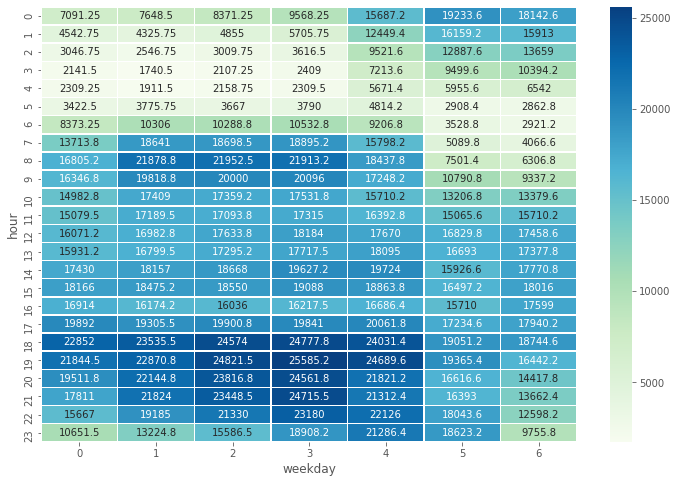

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.groupby(['hour', 'weekday'])['cnt'].mean().unstack(),
           lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});

In [21]:
average_df = df.groupby(['is_weekend', 'hour']).mean()['cnt'].unstack(level=0).rename(columns={0:"weekday", 1:"weekend"})

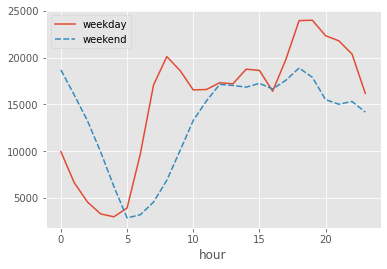

In [22]:
sns.lineplot(data=average_df);

In [23]:
df.head(3)

,cnt,date,weekday,hour,weeknum,is_weekend
pickup_hour,,,,,,
2016-01-01 00:00:00,25270,2016-01-01,4,0,53,0
2016-01-01 01:00:00,28511,2016-01-01,4,1,53,0
2016-01-01 02:00:00,25490,2016-01-01,4,2,53,0


In [24]:
data = df.groupby(['weekday', 'hour']).mean()['cnt'].unstack(level=0).reset_index()
data = data.melt(id_vars="hour", value_vars=[0,1,2,3,4,5,6], value_name='cnt')

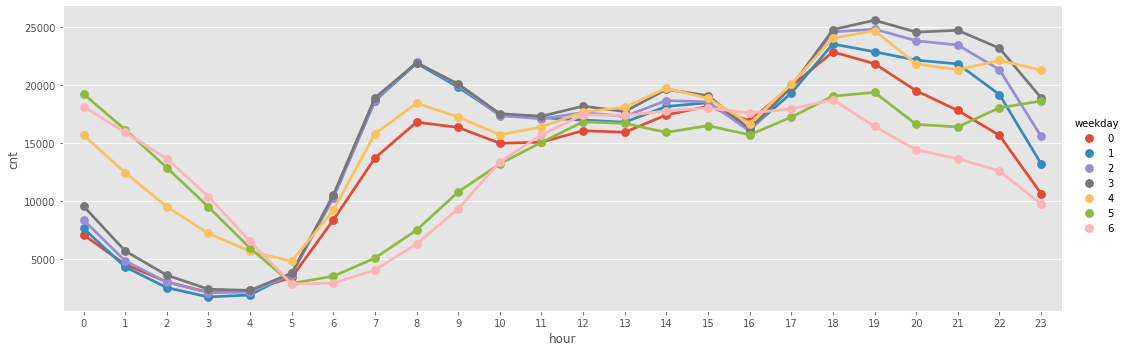

In [25]:
sns.factorplot(x="hour", y='cnt', hue="weekday", data=data, height=5, aspect=3);

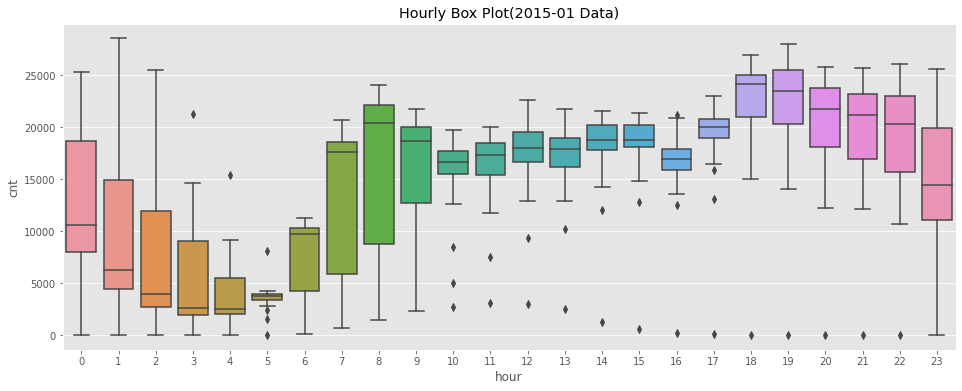

In [26]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df);
plt.title("Hourly Box Plot(2015-01 Data)");

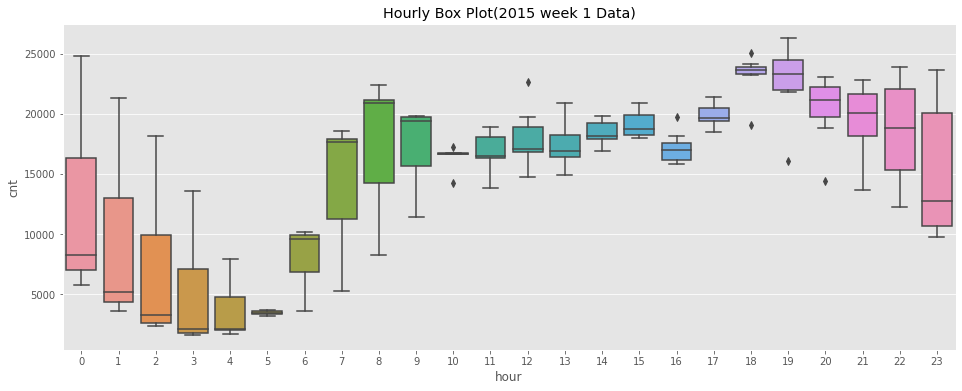

In [27]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==1]);
plt.title("Hourly Box Plot(2015 week 1 Data)");

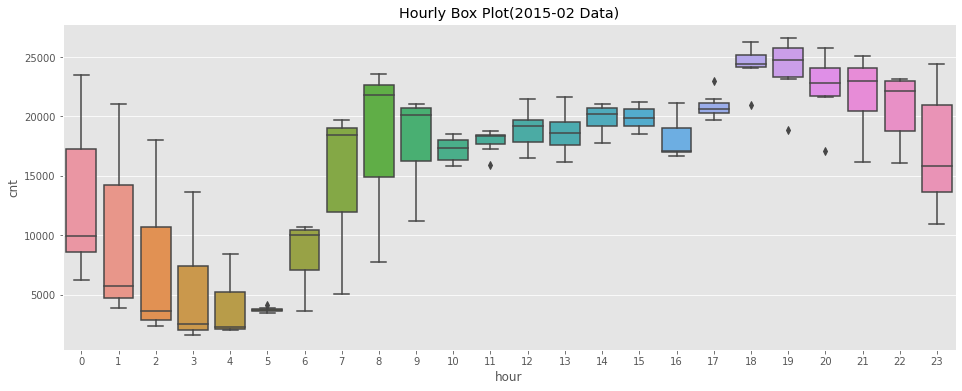

In [28]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==2]);
plt.title("Hourly Box Plot(2015-02 Data)");